# **Linear_Regression_Model to detect price with size on Real estate**

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# **preparing dataset**

**Downloading USA Real Estate dataset from Kaggle**

!pip install kaggle


In [65]:
from google.colab import files #Uploading kaggle.json file to content
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lerapelamasebe","key":"69c064b21e107b5ab0fd35f186472c16"}'}

**Configure Kaggle API**

In [66]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


**Downloading dataset**

In [67]:
!kaggle datasets download -d ahmedshahriarsakib/usa-real-estate-dataset


Dataset URL: https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset
License(s): other
 68% 26.0M/38.2M [00:00<00:00, 268MB/s]
100% 38.2M/38.2M [00:00<00:00, 181MB/s]


In [68]:
!unzip usa-real-estate-dataset.zip

Archive:  usa-real-estate-dataset.zip
  inflating: realtor-data.zip.csv    


In [72]:
df = pd.read_csv("/content/realtor-data.zip.csv")
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [117]:


def wrangle(filepath):
    # Read the dataset
    df1 = pd.read_csv(filepath)

    # Only properties in the state of Puerto Rico
       # Remove rows where 'state' is NaN (if there are any)

    df1 = df1[df1['state'].notna()]
    state = df1["state"].str.contains("Puerto Rico", na=False)
    df1 = df1[state]

    # Only properties which are for sale
    on_sale = df1["status"] == "for_sale"
    df1 = df1[on_sale]

    # Calculate the 0.1 and 0.9 quantiles for the 'house_size' column
    lower = df1['house_size'].quantile(0.1)
    upper = df1['house_size'].quantile(0.9)

    # Filter properties based on the house_size quantiles
    df1 = df1[df1['house_size'].between(lower, upper)]

    #Only propeties under $1000 000.00

    df1 = df1[df1["price"] < 1000000]

    return df1


In [118]:
Rico_frame = wrangle("/content/realtor-data.zip.csv")
print(f"Here is size:  {Rico_frame.shape}")
Rico_frame.head()

Here is size:  (1564, 12)


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
5,103378.0,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,612.0,2520.0,NaN
6,1205.0,for_sale,50000.0,3.0,1.0,0.20,1298094.0,Ciales,Puerto Rico,639.0,2040.0,NaN


# **Building the model**

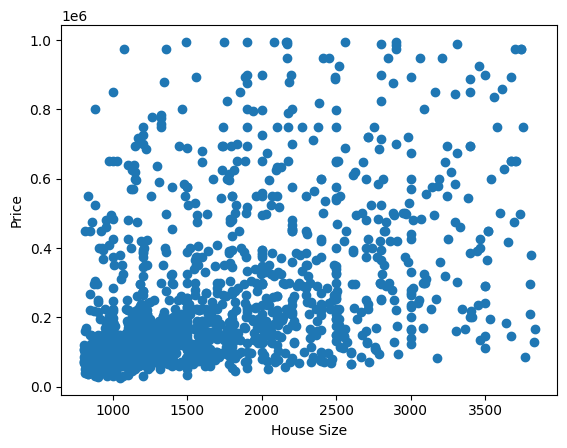

In [119]:
plt.scatter(Rico_frame["house_size"], Rico_frame["price"])
plt.xlabel("House Size")
plt.ylabel("Price")
plt.show()

**Spliting data into feature matrix and target vector for model**

In [120]:
X = Rico_frame[["house_size"]]
Y = Rico_frame["price"]

In [121]:
#Splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.1) #Randomly picking 30% data for test from the whole dataset

In [122]:
y_mean = Y_train.mean() #calculating for target vector
y_mean

241342.71926083867

In [123]:
y_pred_baseline = [y_mean] * len(Y_train) # array/list of repeated means of the length of y_train
y_pred_baseline[:2]

[241342.71926083867, 241342.71926083867]

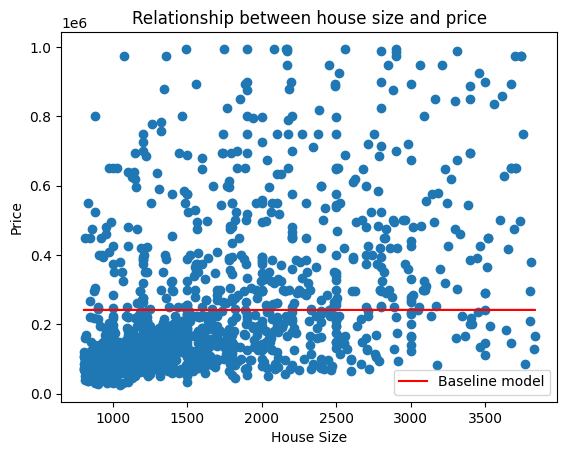

In [145]:
#Drawing baseline model line for training data
plt.scatter(X_train, Y_train)
plt.plot(X_train['house_size'], y_pred_baseline, color="red", label="Baseline model")
plt.xlabel("House Size")
plt.ylabel("Price")
plt.title("Relationship between house size and price")
plt.legend()

In [125]:
#calculating mean abosulet error
mae_baseline = mean_absolute_error(Y_train, y_pred_baseline)
mae_baseline

160408.9070668588

In [126]:
#initiating and fitting model

model = LinearRegression()

model.fit(X_train, Y_train)

LinearRegression()

In [127]:
#Generate predictions

y_pred = model.predict(X_test)

y_pred[:5]

array([338258.58813694, 132136.8379563 , 167771.94684692, 254567.83447679,
       345651.76425532])

In [128]:
#mean absolute error for predicted list

mae_absolute = mean_absolute_error(Y_test, y_pred)
mae_absolute

123831.99700670758

In [129]:
model.score(X_test,Y_test) #R^2 score

0.24148310069248213

In [131]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")


Intercept: -1827.513308881229
Coefficients: [147.86352237]


In [133]:
#Formula for the mode
print(f"Price = {model.intercept_} + {model.coef_[0]} * house_size")

Price = -1827.513308881229 + 147.86352236774712 * house_size


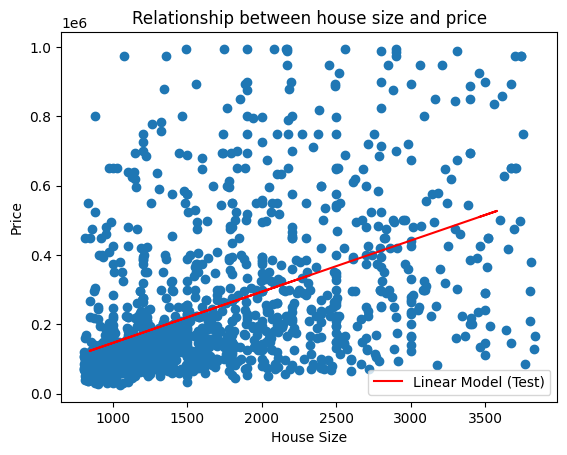

In [147]:
#linear model line drwaing on scatterplot
plt.scatter(X_train, Y_train)
plt.plot(X_test, y_pred_test, label="Linear Model (Test)", color="RED")
plt.xlabel("House Size")
plt.ylabel("Price")
plt.title("Relationship between house size and price")
plt.legend()

**So according to  our model say that the relationship between prices and house_sizes are almost correlated meaning as house_size increase also price increase in state of Puerto Rico**